In [3]:
import pandas as pd
import numpy as np
import squarify as sq
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode()

In [2]:
!pip install squarify

In [4]:
df = pd.read_csv('spotify_top50_2021.csv')

In [5]:
df.head()

id     artist_name                      track_name                track_id  \
0  1  Olivia Rodrigo                 drivers license  5wANPM4fQCJwkGd4rN57mH   
1  2       Lil Nas X  MONTERO (Call Me By Your Name)  1SC5rEoYDGUK4NfG82494W   
2  3   The Kid LAROI       STAY (with Justin Bieber)  5PjdY0CKGZdEuoNab3yDmX   
3  4  Olivia Rodrigo                        good 4 u  4ZtFanR9U6ndgddUvNcjcG   
4  5        Dua Lipa       Levitating (feat. DaBaby)  5nujrmhLynf4yMoMtj8AQF   

   popularity  danceability  energy   key  loudness  mode  speechiness  \
0        92.0         0.561   0.431  10.0    -8.810   1.0       0.0578   
1        90.0         0.593   0.503   8.0    -6.725   0.0       0.2200   
2        92.0         0.591   0.764   1.0    -5.484   1.0       0.0483   
3        95.0         0.563   0.664   9.0    -5.044   1.0       0.1540   
4        89.0         0.702   0.825   6.0    -3.787   0.0       0.0601   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.76800          0.000014    0.1060    0.137  143.875     242013.0   
1       0.29300          0.000000    0.4050    0.710  178.781     137704.0   
2       0.03830          0.000000    0.1030    0.478  169.928     141806.0   
3       0.33500          0.000000    0.0849    0.688  166.928     178147.0   
4       0.00883          0.000000    0.0674    0.915  102.977     203064.0   

   time_signature  
0             4.0  
1             4.0  
2             4.0  
3             4.0  
4             4.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50 non-null     object 
 1   artist_name       49 non-null     object 
 2   track_name        49 non-null     object 
 3   track_id          49 non-null     object 
 4   popularity        49 non-null     float64
 5   danceability      49 non-null     float64
 6   energy            49 non-null     float64
 7   key               49 non-null     float64
 8   loudness          49 non-null     float64
 9   mode              49 non-null     float64
 10  speechiness       49 non-null     float64
 11  acousticness      49 non-null     float64
 12  instrumentalness  49 non-null     float64
 13  liveness          49 non-null     float64
 14  valence           49 non-null     float64
 15  tempo             49 non-null     float64
 16  duration_ms       49 non-null     float64
 17 

In [7]:
df.columns

Index(['id', 'artist_name', 'track_name', 'track_id', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

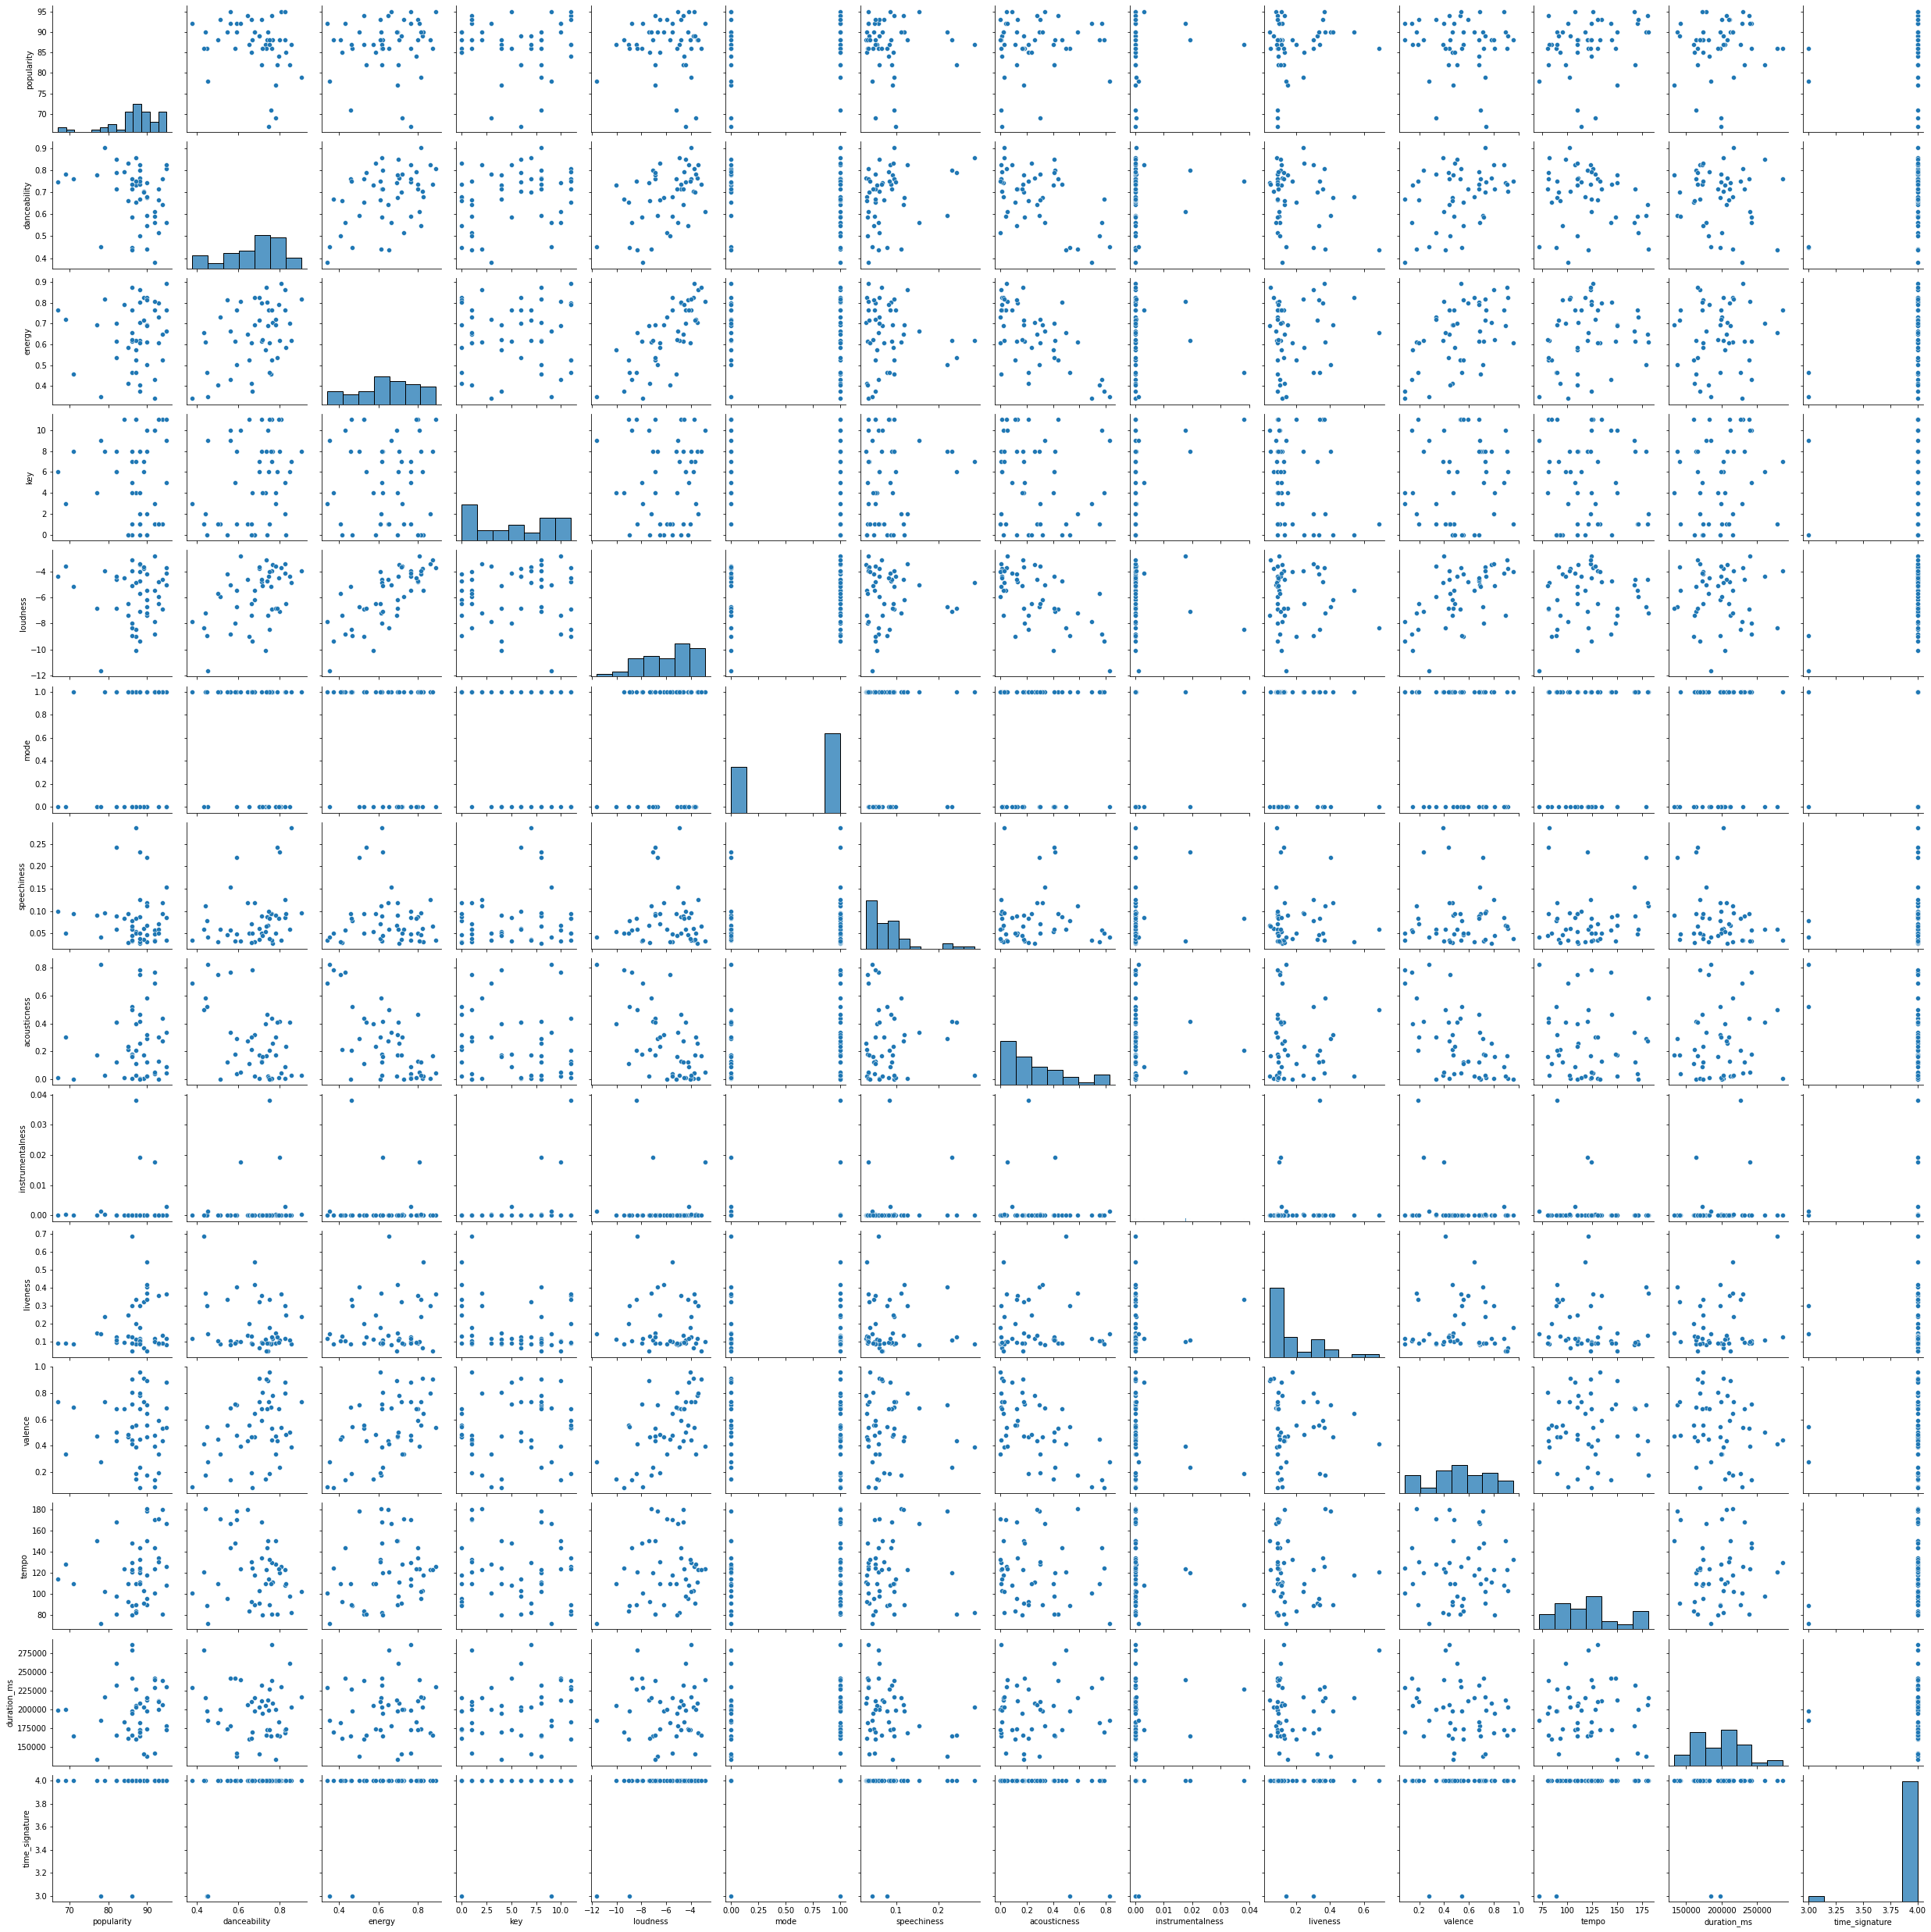

In [9]:
# representing the data in a pairplot()
sns.pairplot(df)

In [10]:
df.hist(figsize=(20,20))
plt.title("Hisogram plot", size=15, weight='bold')

Text(0.5, 1.0, 'Hisogram plot')

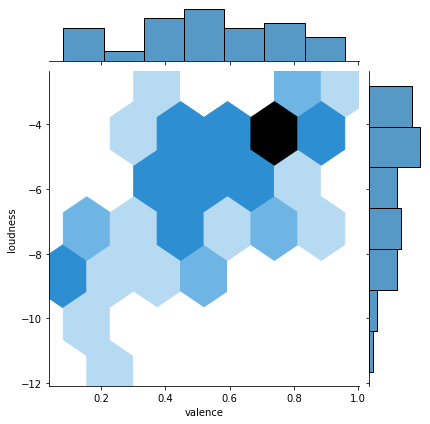

In [11]:
sns.jointplot(x='valence',y='loudness',data=df,kind='hex')
plt.show()

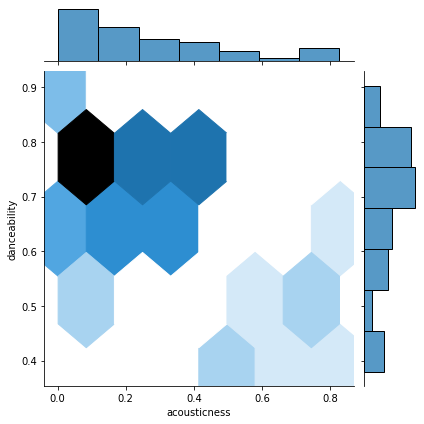

In [12]:
sns.jointplot(x='acousticness',y='danceability',data=df,kind='hex')
plt.show()

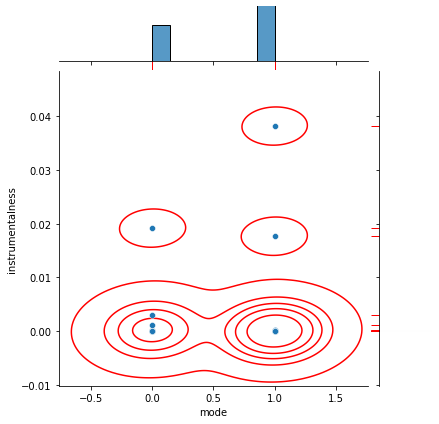

In [13]:
g = sns.jointplot(data=df, x="mode", y="instrumentalness")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

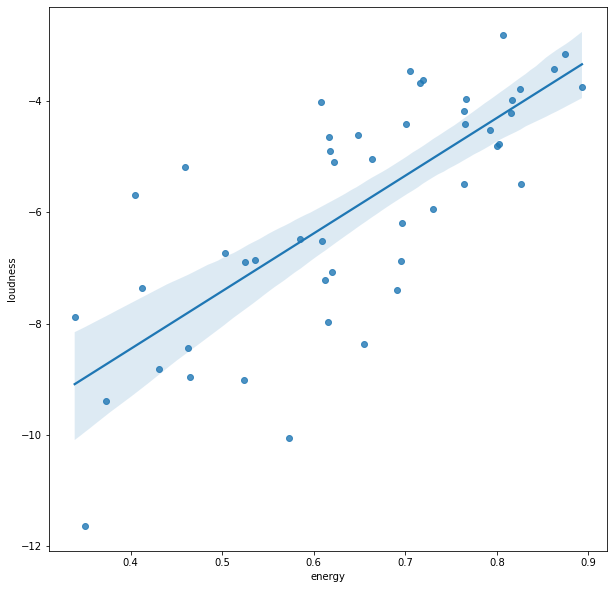

In [14]:
# relation between energy and loudness(db)
fig=plt.figure(figsize=(10,10))
sns.regplot(data=df,x='energy',y='loudness')

Text(0.5, 0, 'Track number')

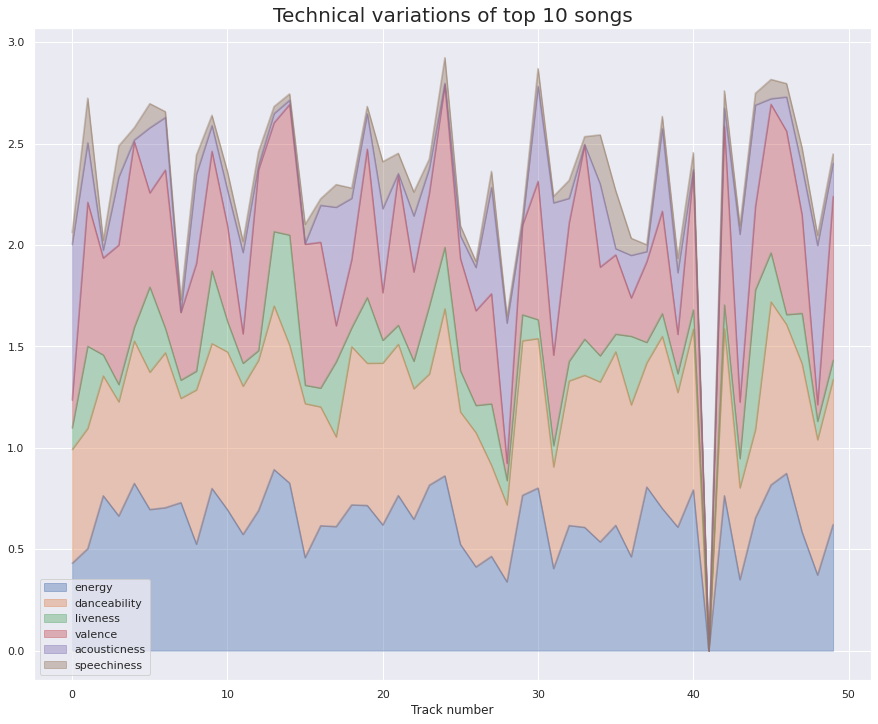

In [15]:
sns.set()
df.plot.area(y=['energy',
       'danceability','liveness', 'valence',
       'acousticness', 'speechiness'],alpha=0.4,figsize=(15,12),stacked=True)
plt.title('Technical variations of top 10 songs',size=20)
plt.xlabel('Track number')


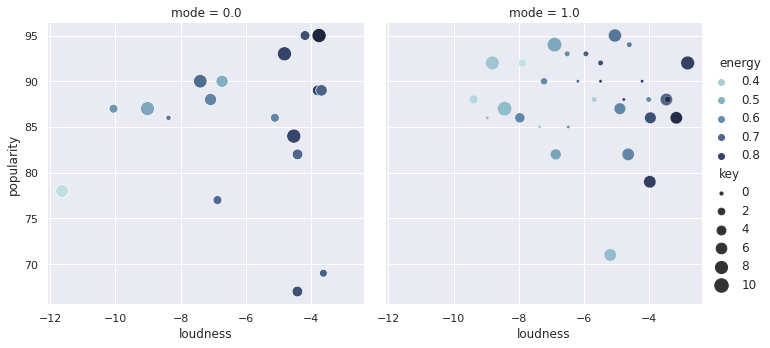

In [16]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="loudness", y="popularity",
    hue="energy", size="key",col="mode",
    palette=cmap, sizes=(10, 200)
)

g.despine(left=True, bottom=True)


cmap_ = sns.cubehelix_palette(rot=-.30, as_cmap=True)
g = sns.relplot(
    data=df,
    x="danceability", y="popularity",
    hue="energy", size="key",col="mode",
    palette=cmap_, sizes=(10, 200),
)

g.despine(left=True, bottom=True)

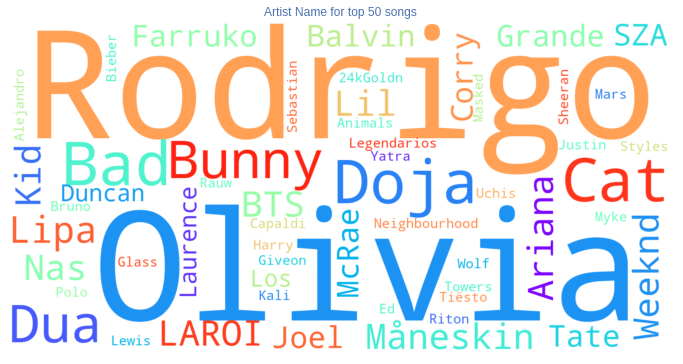

In [17]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df["artist_name"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 50 songs ",color='b')
plt.show()

In [18]:
df['Count']=1
df_artist=df.groupby('artist_name')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_artist.head(10)

artist_name  Count
5         Doja Cat      4
23  Olivia Rodrigo      4
3        Bad Bunny      3
2              BTS      2
32      The Weeknd      2
6         Dua Lipa      2
18       Lil Nas X      2
30   The Kid LAROI      2
1    Ariana Grande      2
22        Måneskin      2

In [19]:
df_artist

artist_name  Count
5            Doja Cat      4
23     Olivia Rodrigo      4
3           Bad Bunny      3
2                 BTS      2
32         The Weeknd      2
6            Dua Lipa      2
18          Lil Nas X      2
30      The Kid LAROI      2
1       Ariana Grande      2
22           Måneskin      2
0            24kGoldn      1
25     Rauw Alejandro      1
24             Polo G      1
28    Sebastian Yatra      1
26              Riton      1
27                SZA      1
20        Masked Wolf      1
29         Tate McRae      1
31  The Neighbourhood      1
21        Myke Towers      1
17      Lewis Capaldi      1
19    Los Legendarios      1
16         Kali Uchis      1
15      Justin Bieber      1
14         Joel Corry      1
13           J Balvin      1
12       Harry Styles      1
11      Glass Animals      1
10             Giveon      1
9             Farruko      1
8          Ed Sheeran      1
7     Duncan Laurence      1
4          Bruno Mars      1
33             Tiësto      1

In [22]:
fig = px.bar(df_artist.head(10),x='artist_name', y='Count',text_auto=True)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title="Top 10 Artist of 2021",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [23]:
fig=px.pie(df_artist.head(10),values='Count',names='artist_name',hole=0.4)
fig.update_layout(title='Top 10 Artist of 2021',font_size=15,title_x=0.45,annotations=[dict(text='Artist',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [24]:
df_top_tracks=df.sort_values(by='popularity',ascending=False).head(10).reset_index(drop=True)
df_top_tracks.index=df_top_tracks.index + 1
df_top_tracks

id     artist_name                 track_name                track_id  \
1    4  Olivia Rodrigo                   good 4 u  4ZtFanR9U6ndgddUvNcjcG   
2   43        Doja Cat                      Woman  6Uj1ctrBOjOas8xZXGqKk4   
3   14      Ed Sheeran                 Bad Habits  3rmo8F54jFF8OgYsqTxm5d   
4   23       Bad Bunny                   Yonaguni  2JPLbjOn0wPCngEot2STUS   
5    9   Glass Animals                 Heat Waves  02MWAaffLxlfxAUY7c5dvx   
6    8      The Weeknd            Blinding Lights  0VjIjW4GlUZAMYd2vXMi3b   
7   10        Måneskin                    Beggin'  3Wrjm47oTz2sjIgck11l5e   
8   40        Doja Cat               Need to Know  3Vi5XqYrmQgOYBajMWSvCi   
9    1  Olivia Rodrigo            drivers license  5wANPM4fQCJwkGd4rN57mH   
10   3   The Kid LAROI  STAY (with Justin Bieber)  5PjdY0CKGZdEuoNab3yDmX   

    popularity  danceability  energy   key  loudness  mode  speechiness  \
1         95.0         0.563   0.664   9.0    -5.044   1.0       0.1540   
2         95.0         0.824   0.764   5.0    -4.175   0.0       0.0854   
3         95.0         0.807   0.893  11.0    -3.745   0.0       0.0347   
4         94.0         0.644   0.648   1.0    -4.601   1.0       0.1180   
5         94.0         0.761   0.525  11.0    -6.900   1.0       0.0944   
6         93.0         0.514   0.730   1.0    -5.934   1.0       0.0598   
7         93.0         0.714   0.800  11.0    -4.808   0.0       0.0504   
8         93.0         0.664   0.609   1.0    -6.509   1.0       0.0707   
9         92.0         0.561   0.431  10.0    -8.810   1.0       0.0578   
10        92.0         0.591   0.764   1.0    -5.484   1.0       0.0483   

    acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
1        0.33500          0.000000    0.0849    0.688  166.928     178147.0   
2        0.08880          0.002940    0.1170    0.881  107.998     172627.0   
3        0.04510          0.000028    0.3660    0.537  126.011     230747.0   
4        0.27600          0.000000    0.1350    0.440  179.951     206710.0   
5        0.44000          0.000007    0.0921    0.531   80.870     238805.0   
6        0.00146          0.000095    0.0897    0.334  171.005     200040.0   
7        0.12700          0.000000    0.3590    0.589  134.002     211560.0   
8        0.30400          0.000000    0.0926    0.194  130.041     210560.0   
9        0.76800          0.000014    0.1060    0.137  143.875     242013.0   
10       0.03830          0.000000    0.1030    0.478  169.928     141806.0   

    time_signature  Count  
1              4.0      1  
2              4.0      1  
3              4.0      1  
4              4.0      1  
5              4.0      1  
6              4.0      1  
7              4.0      1  
8              4.0      1  
9              4.0      1  
10             4.0      1

In [25]:
fig = px.bar(df_top_tracks, x=['good 4 u','Woman','Bad Habits','Yonaguni','Heat Waves','Blinding Lights',
                               'Beggin','Need to Know','drivers license','STAY (with Justin Bieber)'], y='popularity',text_auto=True)
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Top 10 Tracks of 2021',
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [26]:
fig=px.pie(df_top_tracks,values='popularity',names=['good 4 u','Woman','Bad Habits','Yonaguni','Heat Waves','Blinding Lights',
                               'Beggin','Need to Know','drivers license','STAY (with Justin Bieber)'],hole=0.45)
fig.update_layout(title='Top 10 Tracks of 2021',font_size=15,title_x=0.45,annotations=[dict(text='Tracks',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [27]:
fig=px.pie(df,values='valence',names='key',hole=0.35)
fig.update_layout(title='The distribution of valence and key ',font_size=15,title_x=0.45,annotations=[dict(text='valance',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [28]:
fig=px.pie(df,values='acousticness',names='key',hole=0.55)
fig.update_layout(title='The distribution of acousticness and key ',font_size=15,title_x=0.45,annotations=[dict(text='acousticness',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [29]:
fig=px.pie(df,values='speechiness',names='key',hole=0.55)
fig.update_layout(title='The distribution of speechiness and key ',font_size=15,title_x=0.45,annotations=[dict(text='speechiness',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [30]:
fig = px.scatter(df, x="popularity", y="energy")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Energy effect on popularity')
fig.show()

In [31]:
fig = px.scatter(df, x="popularity", y="loudness")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Loudness effect on popularity')
fig.show()

In [32]:
fig = px.scatter(df, x="popularity", y="speechiness")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Speechiness effect on popularity')
fig.show()

In [33]:
fig = px.scatter(df, x="popularity", y="acousticness")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Acousticness effect on popularity')
fig.show()

In [34]:
fig = px.scatter(df, x="popularity", y="tempo")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Tempo effect on popularity')
fig.show()

In [35]:
fig = px.scatter(df, x="popularity", y="valence")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Valence effect on popularity')
fig.show()